In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import attila_utils

In [2]:
fpath = '../../resources/QPS/5xFAD-mouse/CO28152_NFL-GFAP_datasum.xlsx'
nfl_invivo = pd.read_excel(fpath, sheet_name='NFL in vivo clean')
nfl_invivo = nfl_invivo.melt(id_vars=['Cohort', 'Group', 'IRN', 'Sex', 'Genotype'], value_name='NF-L')
nfl_invivo['Week'] = nfl_invivo.variable.str.replace('NF-L week ', '').astype(int)
nfl_invivo

,Cohort,Group,IRN,Sex,Genotype,variable,NF-L,Week
0,I,A,15117,f,tg/wt,NF-L week 0,576.0,0
1,I,A,15119,f,tg/wt,NF-L week 0,698.0,0
2,I,A,14627 A,f,tg/wt,NF-L week 0,701.0,0
3,III,A,15161,f,tg/wt,NF-L week 0,574.0,0
4,II,A,15938,m,tg/wt,NF-L week 0,291.0,0
...,...,...,...,...,...,...,...,...
231,V,J,15195 A,f,wt/wt,NF-L week 12,42.0,12
232,VI,J,15251,f,wt/wt,NF-L week 12,35.0,12
233,V,J,16180,m,wt/wt,NF-L week 12,24.0,12
234,V,J,16192,m,wt/wt,NF-L week 12,44.0,12


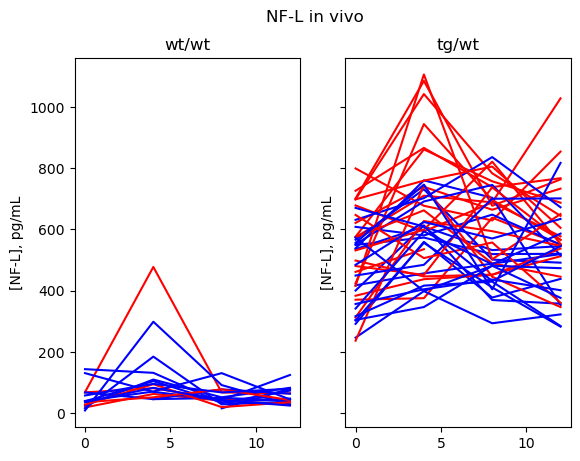

In [3]:
fig, ax = plt.subplots(1, 2, sharey=True)
fig.suptitle('NF-L in vivo')
for axi, genotype in zip(ax, nfl_invivo.Genotype.sort_values(ascending=False).unique()):
    df_genotype = nfl_invivo.loc[nfl_invivo.Genotype == genotype]
    axi.set_title(genotype)
    axi.set_ylabel('[NF-L], pg/mL')
    for irn in df_genotype.IRN.unique():
        df = df_genotype.loc[df_genotype.IRN == irn]
        sex = df.Sex.unique()[0]
        color = {'m': 'blue', 'f': 'red'}[sex]
        marker = '$' + df.Group.unique()[0] + '$'
        axi.plot('Week', 'NF-L', data=df, color=color, marker='')
    
    attila_utils.savefig(fig, 'NF-L-in-vivo')

In [4]:
%connect_info

{
  "shell_port": 58344,
  "iopub_port": 58345,
  "stdin_port": 58346,
  "control_port": 58348,
  "hb_port": 58347,
  "ip": "127.0.0.1",
  "key": "91777b95-463ae6c3c460f09cb7b19ea9",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": "python3"
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-9616787d-e771-4cc5-98dd-fccbecdfb16f.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
